In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"D:\python\projects\banking_system\Czeladz mieszkania")
df.head()

,name,metrage in m2,number of rooms,floor,balcony,price in zl,price per metre in zl
0,Mieszkanie 3-pokojowe Czeladź BEZ POŚREDNIKÓW,"Powierzchnia57,5 m²",Liczba pokoi3,Piętro3/3,Balkon / ogród / tarasbalkon,325 000 zł,5 652 zł/m²
1,"Mieszkanie Czeladź, Niepodległości, 3 pokoje",Powierzchnia52 m²,Liczba pokoi3,Piętro4/4,Balkon / ogród / tarasbalkon,399 000 zł,7 673 zł/m²
2,Mieszkanie M2 30m2 - ul. Miasta Auby 2,Powierzchnia30 m²,Liczba pokoi1,Piętro4/10,Balkon / ogród / taraszapytaj,166 000 zł,5 533 zł/m²
3,Mieszkanie 3-pokojowe Czeladź BEZ POŚREDNIKÓW,"Powierzchnia57,5 m²",Liczba pokoi3,Piętro3/3,Balkon / ogród / tarasbalkon,325 000 zł,5 652 zł/m²
4,Dwupokojowe w Czeladzi !!!,Powierzchnia43 m²,Liczba pokoi2,Piętro2/4,Balkon / ogród / tarasbalkon,190 000 zł,4 419 zł/m²


In [3]:
df = df.drop_duplicates()
df.head()

,name,metrage in m2,number of rooms,floor,balcony,price in zl,price per metre in zl
0,Mieszkanie 3-pokojowe Czeladź BEZ POŚREDNIKÓW,"Powierzchnia57,5 m²",Liczba pokoi3,Piętro3/3,Balkon / ogród / tarasbalkon,325 000 zł,5 652 zł/m²
1,"Mieszkanie Czeladź, Niepodległości, 3 pokoje",Powierzchnia52 m²,Liczba pokoi3,Piętro4/4,Balkon / ogród / tarasbalkon,399 000 zł,7 673 zł/m²
2,Mieszkanie M2 30m2 - ul. Miasta Auby 2,Powierzchnia30 m²,Liczba pokoi1,Piętro4/10,Balkon / ogród / taraszapytaj,166 000 zł,5 533 zł/m²
4,Dwupokojowe w Czeladzi !!!,Powierzchnia43 m²,Liczba pokoi2,Piętro2/4,Balkon / ogród / tarasbalkon,190 000 zł,4 419 zł/m²
6,Klimatyczne 2 pokoje po generalnym remoncie!,Powierzchnia34 m²,Liczba pokoi2,Piętrozapytaj,Balkon / ogród / taraszapytaj,199 000 zł,5 853 zł/m²


In [4]:
#metrage
old_metrage = df["metrage in m2"]
new_metrage = []
for x in old_metrage:
    x = x.replace("Powierzchnia", "")
    x = x.replace(" m²", "")
    x = x.replace(",", ".")
    new_metrage.append(float(x))
df["metrage in m2"] = new_metrage

In [5]:
#rooms
old_number = df["number of rooms"]
new_number = []
for x in old_number:
    x = x.replace("Liczba pokoi", "")
    new_number.append(int(x))
df["number of rooms"] = new_number

In [6]:
#floor
old_floor = df["floor"]
new_floor = []
for x in old_floor:
    x = x.replace("Piętro", "")
    if "parter" in x:
        x = x.replace("parter", "0")
    if "poddasze" in x:
        x = x.replace("poddasze", "0")
    new_floor.append(x)
df["floor"] = new_floor
df = df[df["floor"] != "zapytaj"] 
final_floor = []
for x in df["floor"]:
    final_floor.append(int(x[0]))
df["floor"] = final_floor

In [7]:
#balcony
new_balcony = []
for x in df["balcony"]:
    x = x.replace("Balkon / ogród / taras", "")
    if x == "balkon":
        x = 1
    else:
        x = 0
    new_balcony.append(x)
df["balcony"] = new_balcony

In [8]:
#price
new_price = []
for x in df["price in zl"]:
    x = x.replace("zł", "")
    x = x.replace(" ", "")
    new_price.append(int(x))
df["price in zl"] = new_price

In [9]:
#price per metre
new_price_per_metre = []
for x in df["price per metre in zl"]:
    x = x.replace("zł/m²", "")
    x = x.replace(" ", "")
    new_price_per_metre.append(int(x))
df["price per metre in zl"] = new_price_per_metre

In [10]:
df.head()

,name,metrage in m2,number of rooms,floor,balcony,price in zl,price per metre in zl
0,Mieszkanie 3-pokojowe Czeladź BEZ POŚREDNIKÓW,57.5,3,3,1,325000,5652
1,"Mieszkanie Czeladź, Niepodległości, 3 pokoje",52.0,3,4,1,399000,7673
2,Mieszkanie M2 30m2 - ul. Miasta Auby 2,30.0,1,4,0,166000,5533
4,Dwupokojowe w Czeladzi !!!,43.0,2,2,1,190000,4419
7,Mieszkanie po KAPITALNYM REMONCIE Czeladź,49.0,2,0,1,322500,6582


In [11]:
aparment_rooms = df.groupby("number of rooms").count()
aparment_rooms

,name,metrage in m2,floor,balcony,price in zl,price per metre in zl
number of rooms,,,,,,
1,14,14,14,14,14,14
2,39,39,39,39,39,39
3,17,17,17,17,17,17
4,3,3,3,3,3,3
6,1,1,1,1,1,1


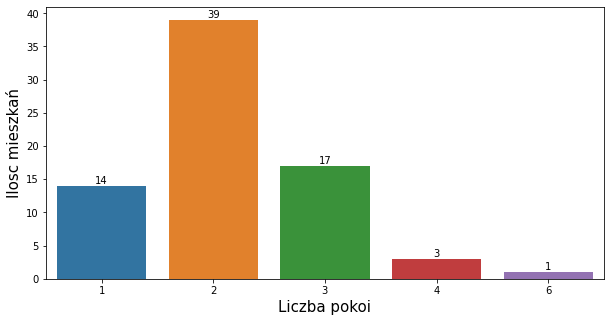

In [12]:
plt.figure(figsize=(10,5))

ax = sns.barplot(y=aparment_rooms.name,
            x=aparment_rooms.index)

plt.xlabel("Liczba pokoi", size=15)
plt.ylabel("Ilosc mieszkań", size=15)

for i in ax.containers:
    ax.bar_label(i,)

In [13]:
prize_per_num_rooms = df.groupby("number of rooms")["price in zl"].mean()
prize_per_num_rooms

number of rooms
1    160499.857143
2    233851.205128
3    304528.823529
4    405666.666667
6    590000.000000
Name: price in zl, dtype: float64

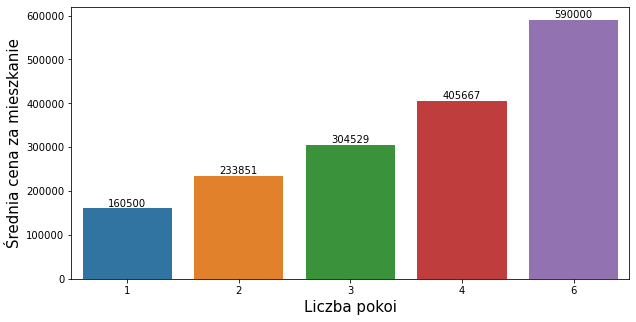

In [14]:
plt.figure(figsize=(10,5))

ax = sns.barplot(y=prize_per_num_rooms.values,
            x=prize_per_num_rooms.index)

plt.xlabel("Liczba pokoi", size=15)
plt.ylabel("Średnia cena za mieszkanie", size=15)

for i in ax.containers:
    ax.bar_label(i,)

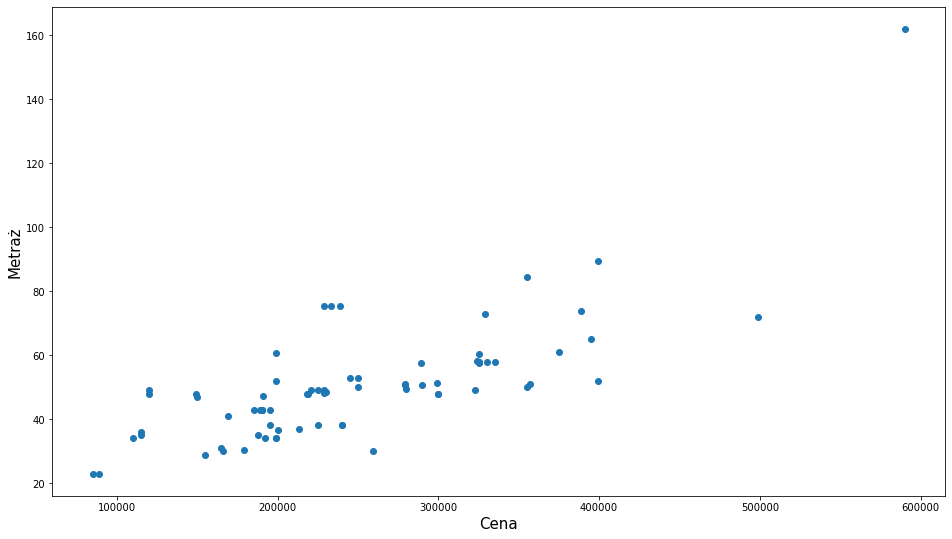

In [15]:
plt.figure(figsize=(16,9))
plt.xlabel("Cena", size=15)
plt.ylabel("Metraż", size=15)

plt.scatter(y=df["metrage in m2"],
           x=df["price in zl"])

In [16]:
num_of_balconies = df[df["balcony"] == 1].count()[0]
num_of_balconies

45

In [17]:
X = df.iloc[:, 1:5]
X.head()

,metrage in m2,number of rooms,floor,balcony
0,57.5,3,3,1
1,52.0,3,4,1
2,30.0,1,4,0
4,43.0,2,2,1
7,49.0,2,0,1


In [18]:
y = df.iloc[:, 5]
y.head()

0    325000
1    399000
2    166000
4    190000
7    322500
Name: price in zl, dtype: int64

In [19]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.6567819368654225

In [20]:
my_apartment = np.array([38, 1, 3, 1])
my_prediction = lr.predict(my_apartment.reshape(1, -1))
print(my_prediction)

[194901.04311605]
